In [124]:
import pandas as pd
import random
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import layers 

import matplotlib.pyplot as plt

In [125]:
# data import
import pandas as pd

# Specify the file path
file_path = '/Users/wangfan/Downloads/tweets.csv'

# Load the dataset
df = pd.read_csv(file_path)

df = df.iloc[1:,1:]
df

,text,sentiment
1,rising cases of covid does not alarm me rising...,1
2,please vote for chicagoindiaresolution marking...,0
3,wishing all of you eidaladha hazrat ibrahim as...,1
4,daily coronavirus cases in india top for first...,1
5,sitting here india style watching the raindrop...,0
...,...,...
134343,happydiwali to india from dgisi and dgispr you...,1
134344,india has been involved in many countries with...,1
134345,does anybody know website which ships pre orde...,0
134346,what hinted few weeks back in an interview wit...,0


In [126]:
df = df.dropna(axis=0)
df.sample(5)

,text,sentiment
115135,feel just lost what little respect had among m...,1
924,we the students are the future of our state ou...,1
3478,we sincerely request the staff selection commi...,1
43395,feel so sad for james newman europe should be ...,1
106884,getting the mock up written for the adventure ...,1


In [127]:
X = df['text']
y = df['sentiment']

y.value_counts()

sentiment
1    68676
0    65653
Name: count, dtype: int64

In [128]:
from tensorflow.keras.utils import to_categorical

y_Onehot =  to_categorical(y)

In [129]:
# splitting data to test and train sets

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y_Onehot, test_size=0.25,random_state = 42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

100746 33583 100746 33583


In [130]:
print(X_test)

['there is great feeling when someone who never understood bitcoin spends their time reading about it and realizing how amazing it is there is great feeling when someone who never understood ethereum spends their time reading about it and realizing how amazing it is'
 'didn enjoy some money troubles credit cards perhaps online gambling'
 'vh playlist love by chungha' ... 'justice needed ssr'
 'just need you all to know that my mother has become real human again since was deplatformed the idea that companies will forget the damage he did and let him rejoin their platforms is so horrific'
 'will not stop worrying no matter how many email leaks lab leaks until lockdowns become the focus of conversation universily maligned and those in positions of power responsible for knowingly instituting them propagandizing them or falsifying data for them']


In [131]:
# basic adjustment for vectorizer based on a dataset

max_vocab_length = 50000 # how many words our dictionary will include
max_length = 25 # how many words from a tweet will be included

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length,
                                    standardize='lower_and_strip_punctuation'
                                   )

In [132]:
# fit the text vectorizer to teh train data
text_vectorizer.adapt(X_train)

In [133]:
X_train = text_vectorizer(X_train)
X_test = text_vectorizer(X_test)

In [134]:
print(X_test)

tf.Tensor(
[[  64    6  200 ...   64    6  200]
 [ 418  747   81 ...    0    0    0]
 [2393 1387   71 ...    0    0    0]
 ...
 [ 381  776  837 ...    0    0    0]
 [  27  106    9 ...  600    2  125]
 [  37   12  183 ...  173    7 3847]], shape=(33583, 25), dtype=int64)


In [135]:
np.save('/Users/wangfan/Downloads/X_test_tweets.npy', X_test)
np.save('/Users/wangfan/Downloads/y_test_tweets.npy', y_test)

In [136]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten

model = Sequential()

model.add(Embedding(max_vocab_length,128))

model.add(LSTM(units=64,dropout=0.2,recurrent_dropout=0.2,kernel_regularizer=keras.regularizers.l1(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(2,activation='softmax'))

model.summary()  
print("")  

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_34 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_66 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [137]:
from keras.optimizers import SGD

callback = keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)

# 定義訓練方式  
sgd = SGD(learning_rate = 0.001, momentum = 0.95)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
  
# Train the model
train_history = model.fit(x=X_train, y=y_train, validation_split=0.2,callbacks=[callback], epochs=3, batch_size=128, verbose=1)

Epoch 1/3
630/630 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.5237 - loss: 1.5440 - val_accuracy: 0.8341 - val_loss: 0.4444
Epoch 2/3
630/630 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.8499 - loss: 0.4205 - val_accuracy: 0.8530 - val_loss: 0.3668
Epoch 3/3
630/630 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9001 - loss: 0.3015 - val_accuracy: 0.8683 - val_loss: 0.3362


In [138]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.33790263533592224
Test accuracy: 0.8672840595245361


In [139]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions and true labels from one-hot encoding to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Confusion Matrix:
[[13893  2484]
 [ 1973 15233]]


In [140]:
model.save('/Users/wangfan/Downloads/tweets.keras')

In [62]:
# vectorizer from tensorflow documentation
text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None,
                                    output_mode='int',
                                    output_sequence_length=None,
                                    pad_to_max_tokens=False,
                                    vocabulary=None,
                                    idf_weights=None,
                                    sparse=False,
                                    ragged=False,
                                    encoding='utf-8',
                                    name=None
                                   )

In [63]:
# average number of words in tweets
sum_words = 0
for i in range(len(X_train)):
    n = len(str(X_train[i]).split(' '))
    sum_words += n

print(round(sum_words/len(X_train)))

25


In [64]:
# basic adjustment for vectorizer based on a dataset

max_vocab_length = 50000 # how many words our dictionary will include
max_length = 25 # how many words from a tweet will be included

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length,
                                    standardize='lower_and_strip_punctuation',
                                    
                                   )

In [65]:
# fit the text vectorizer to teh train data
text_vectorizer.adapt(X_train)

In [66]:
# test our vectorizer on a sample
random_sentence = random.choice(X_train)
print(f'Orginal text:\n {random_sentence}\n\nVectorized version:\n {text_vectorizer([random_sentence])}')

Orginal text:
 some people are too sensitive for the goals they wish to achieve if word gets broken plan falls short or hard times come in general they dwell in sadness and wake up years old

Vectorized version:
 [[  81   32   18  120 3147   10    2 1596   29  320    3 2991   33  670
   416   54  992 3979  919   40  230  282  204    7 1010]]


In [67]:
# get the samples of unique words in the vocabulary 
words_in_vocab = text_vectorizer.get_vocabulary()
print(f'number of words: {len(words_in_vocab)}')
print(f'5 most common words: {words_in_vocab[:5]}')
print(f'5 least common words: {words_in_vocab[-5:]}')

number of words: 50000
5 most common words: ['', '[UNK]', 'the', 'to', 'and']
5 least common words: ['payrolls', 'payrise', 'payrents', 'paypigs', 'paypet']


In [68]:
embedding = Embedding(input_dim=max_vocab_length,
                      output_dim=128,
                     )

# checking with random sentence
print(f'Orginal sentence: \n{random_sentence}')
print(f'\nEmbedded version: \n{embedding(text_vectorizer([random_sentence]))}')

Orginal sentence: 
some people are too sensitive for the goals they wish to achieve if word gets broken plan falls short or hard times come in general they dwell in sadness and wake up years old

Embedded version: 
[[[-0.01896955  0.01893577 -0.02269571 ... -0.02428241 -0.00274803
    0.04554654]
  [-0.04314819 -0.00407613 -0.02833084 ... -0.0227771  -0.02639416
   -0.00853605]
  [ 0.04422745 -0.02436074 -0.03041203 ... -0.0379609  -0.02109083
   -0.0409299 ]
  ...
  [ 0.02052485 -0.02448192  0.0042793  ...  0.02735194  0.00892397
    0.03370355]
  [ 0.03622421  0.04195027 -0.00591999 ... -0.01958017  0.02826786
   -0.04555368]
  [ 0.0451121   0.03443389 -0.03372644 ...  0.04756725  0.02776909
    0.02019921]]]


In [69]:
# a function for scoring/comparison
def calculate_score(y_true, y_pred):
    model_accuracy = accuracy_score(y_true, y_pred)
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    model_results = {'accuracy': round(model_accuracy, 6),
                    'precision': round(model_precision, 6),
                    'recall': round(model_recall, 6),
                    'f1': round(model_f1, 6)}
    return model_results

# a function for callback
lr_scheduler = LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

In [87]:
from keras.optimizers import SGD
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def create_model(inputs, outputs, name, epochs, X_train, y_train, X_val, y_val):
    
    model = tf.keras.Model(inputs, outputs, name=name)
    print(model.summary())
    
    # 定義訓練方式  
    sgd = SGD(learning_rate = 0.001, momentum = 0.95)

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

    train_history = model.fit(x=X_train,
              y=y_train,
              epochs=epochs,
              validation_data=(X_val, y_val))
    
    # Evaluation
    model_pred = model.predict(X_val)
    model_pred = tf.squeeze(tf.round(model_pred))

    model_results = calculate_score(y_true=y_val, y_pred=model_pred)
    print(model_results)

    
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Convert predictions and true labels from one-hot encoding to class indices
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(conf_matrix)
    
    model.save('/Users/wangfan/Downloads/tweets.keras')

    return model_results, model_pred

In [101]:
import keras
from keras.models import Sequential  
from keras.layers import LSTM,Dense,Dropout,Flatten,BatchNormalization,Embedding,TextVectorization

model = Sequential()

inputs = layers.Input(shape=(1,), dtype=tf.string)

model.add(TextVectorization(max_tokens=None,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None,
                                    output_mode='int',
                                    output_sequence_length=max_length,
                                    pad_to_max_tokens=False,
                                    vocabulary=None,
                                    idf_weights=None,
                                    sparse=False,
                                    ragged=False,
                                    encoding='utf-8',
                                    name=None,
                                    max_tokens=max_vocab_length
                                   ))

model.add(Embedding(input_dim=max_vocab_length,output_dim=128))

model.add(LSTM(units=64,dropout=0.2,recurrent_dropout=0.2,kernel_regularizer=keras.regularizers.l1(0.001),name='LSTM'))  
model.add(Dropout(0.5, name='dropout_1'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5,name='dropout_2'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5,name='dropout_3'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))
model.summary()  
print("")  

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [90]:
import keras
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = embedding(text_vectorizer(inputs))
x = layers.LSTM(units=64,dropout=0.2,recurrent_dropout=0.2,kernel_regularizer=keras.regularizers.l1(0.001))(x)
x = layers.Dropout(0.5)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(64, activation='relu')(x)  # you can use additional layer to improve your model
x = layers.Dropout(0.5)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(32, activation='relu')(x)  # you can use additional layer to improve your model
x = layers.Dropout(0.5)(x)
x = layers.BatchNormalization()(x)
outputs = layers.Dense(2, activation='softmax')(x)

In [91]:
model_2_results, model_2_pred = create_model(inputs, outputs, 'model_2', 5, X_train, y_train, X_test, y_test)

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_26 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_3            │ (None, 25)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 25, 128)        │     6,400,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,456,354 (24.63 MB)

 Trainable params: 6,456,034 (24.63 MB)

 Non-trainable params: 320 (1.25 KB)

None
Epoch 1/5
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 78s 24ms/step - accuracy: 0.7872 - loss: 0.8753 - val_accuracy: 0.8360 - val_loss: 0.4223
Epoch 2/5
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 74s 23ms/step - accuracy: 0.8848 - loss: 0.3379 - val_accuracy: 0.8706 - val_loss: 0.3418
Epoch 3/5
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 74s 24ms/step - accuracy: 0.8994 - loss: 0.3013 - val_accuracy: 0.8731 - val_loss: 0.3298
Epoch 4/5
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 75s 24ms/step - accuracy: 0.9157 - loss: 0.2709 - val_accuracy: 0.8724 - val_loss: 0.3339
Epoch 5/5
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 75s 24ms/step - accuracy: 0.9212 - loss: 0.2589 - val_accuracy: 0.8708 - val_loss: 0.3582
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
{'accuracy': 0.870828, 'precision': 0.872055, 'recall': 0.870828, 'f1': 0.870821}
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Confusion Matrix:
[[14656  1721]
 [ 2617 14589]]


In [74]:
import keras
from keras.models import Sequential  
from keras.layers import LSTM, Dense, Dropout, BatchNormalization, Embedding

model = tf.keras.Model(layers.Input(shape=(1,), dtype=tf.string), Dense(2, activation='softmax', name='output'), name='LSTM')

# Assuming `embedding` and `text_vectorizer` are previously defined layers or functions.
model.add(embedding(text_vectorizer))  # Directly add the embedding layer

model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=keras.regularizers.l1(0.001), name='LSTM'))  
model.add(Dropout(0.5, name='dropout_1'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', name='dense_1'))
model.add(Dropout(0.5, name='dropout_2'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu', name='dense_2'))
model.add(Dropout(0.5, name='dropout_3'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax', name='output'))

model.summary()  

ValueError: All `outputs` values must be KerasTensors. Received: outputs=<Dense name=output, built=False> including invalid value <Dense name=output, built=False> of type <class 'keras.src.layers.core.dense.Dense'>

In [72]:
import keras
from keras.models import Sequential  
from keras.layers import LSTM,Dense,Dropout,Flatten,BatchNormalization

model = Sequential()

inputs = layers.Input(shape=(1,), dtype=tf.string)

model.add(embedding(text_vectorizer(inputs)))

model.add(LSTM(units=64,dropout=0.2,recurrent_dropout=0.2,kernel_regularizer=keras.regularizers.l1(0.001),name='LSTM'))  
model.add(Dropout(0.5, name='dropout_1'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'),name='dense_1')
model.add(Dropout(0.5,name='dropout_2'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'),name='dense_2')
model.add(Dropout(0.5,name='dropout_3'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax', name='output'))
model.summary()  
print("")  

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <KerasTensor shape=(None, 25, 128), dtype=float32, sparse=False, name=keras_tensor_146> (of type <class 'keras.src.backend.common.keras_tensor.KerasTensor'>)

In [71]:
# creating tokenization and modelling pipeline
model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# fit the pipeline to the training data
model_0.fit(X_train, y_train)

ValueError: y should be a 1d array, got an array of shape (100746, 2) instead.

In [21]:
# Evaluation
baseline_pred = model_0.predict(X_test)

baseline_results = calculate_score(y_true=y_test, y_pred=baseline_pred)
baseline_results

{'accuracy': 0.805032,
 'precision': 0.80509,
 'recall': 0.805032,
 'f1': 0.804958}

In [22]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = embedding(text_vectorizer(inputs))
x = layers.GlobalAveragePooling1D()(x) # condense the feature vector for each token to one vector
outputs = layers.Dense(1, activation='sigmoid')(x) # output should be binary therefore activation is sigmoid

In [23]:
model_1_results, model_1_pred = create_model(inputs, outputs, 'model_1', 5, X_train, y_train, X_test, y_test)

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 25)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 25, 128)        │     6,400,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,400,129 (24.41 MB)

 Trainable params: 6,400,129 (24.41 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - accuracy: 0.7717 - loss: 0.4768 - val_accuracy: 0.8686 - val_loss: 0.3189
Epoch 2/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - accuracy: 0.9042 - loss: 0.2597 - val_accuracy: 0.8730 - val_loss: 0.3334
Epoch 3/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - accuracy: 0.9214 - loss: 0.2220 - val_accuracy: 0.8719 - val_loss: 0.3368
Epoch 4/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - accuracy: 0.9287 - loss: 0.2011 - val_accuracy: 0.8652 - val_loss: 0.3562
Epoch 5/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - accuracy: 0.9331 - loss: 0.1920 - val_accuracy: 0.8643 - val_loss: 0.3732
840/840 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
{'accuracy': 0.864289, 'precision': 0.864293, 'recall': 0.864289, 'f1': 0.864273}


In [24]:
# comparison to the baseline
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([ True,  True,  True,  True])

In [56]:
import keras
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = embedding(text_vectorizer(inputs))
x = layers.LSTM(units=512,dropout=0.2,recurrent_dropout=0.2,kernel_regularizer=keras.regularizers.l1(0.01))(x)
x = layers.Dropout(0.5)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation='relu')(x)  # you can use additional layer to improve your model
x = layers.Dropout(0.5)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation='relu')(x)  # you can use additional layer to improve your model
x = layers.Dropout(0.5)(x)
x = layers.BatchNormalization()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

In [57]:
model_2_results, model_2_pred = create_model(inputs, outputs, 'model_2', 5, X_train, y_train, X_test, y_test)

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 25)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 25, 128)        │     6,400,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 512)            │     1,312,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,880,705 (30.06 MB)

 Trainable params: 7,878,913 (30.06 MB)

 Non-trainable params: 1,792 (7.00 KB)

None
Epoch 1/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 254s 75ms/step - accuracy: 0.8590 - loss: 3.6665 - val_accuracy: 0.8386 - val_loss: 0.8457
Epoch 2/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 259s 77ms/step - accuracy: 0.9162 - loss: 0.6496 - val_accuracy: 0.8418 - val_loss: 0.7884
Epoch 3/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 249s 74ms/step - accuracy: 0.9288 - loss: 0.5925 - val_accuracy: 0.8417 - val_loss: 0.7727
Epoch 4/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 254s 75ms/step - accuracy: 0.9359 - loss: 0.5613 - val_accuracy: 0.8405 - val_loss: 1.1833
Epoch 5/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 259s 77ms/step - accuracy: 0.9402 - loss: 0.6016 - val_accuracy: 0.8593 - val_loss: 0.7646
840/840 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step
{'accuracy': 0.859339, 'precision': 0.859894, 'recall': 0.859339, 'f1': 0.859202}


In [27]:
# comparison to the baseline
np.array(list(model_2_results.values())) > np.array(list(baseline_results.values()))

array([ True,  True,  True,  True])

In [24]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = embedding(text_vectorizer(inputs))
x = layers.GRU(units=64, return_sequences=True)(x)
x = layers.GRU(units=64)(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

In [25]:
model_3_results, model_3_pred = create_model(inputs, outputs, 'model_3', 5, X_train, y_train, X_test, y_test)

Model: "model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 25)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 25, 128)        │     6,400,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 25, 64)         │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,466,433 (24.67 MB)

 Trainable params: 6,466,433 (24.67 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 212s 62ms/step - accuracy: 0.9428 - loss: 0.1387 - val_accuracy: 0.8650 - val_loss: 0.5431
Epoch 2/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 207s 62ms/step - accuracy: 0.9847 - loss: 0.0419 - val_accuracy: 0.8670 - val_loss: 0.5476
Epoch 3/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 206s 61ms/step - accuracy: 0.9906 - loss: 0.0267 - val_accuracy: 0.8679 - val_loss: 0.6804
Epoch 4/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 206s 61ms/step - accuracy: 0.9934 - loss: 0.0184 - val_accuracy: 0.8690 - val_loss: 0.7092
Epoch 5/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 211s 63ms/step - accuracy: 0.9957 - loss: 0.0125 - val_accuracy: 0.8632 - val_loss: 0.8434
840/840 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
{'accuracy': 0.86321, 'precision': 0.863467, 'recall': 0.86321, 'f1': 0.863122}


In [26]:
# comparison to the baseline
np.array(list(model_3_results.values())) > np.array(list(baseline_results.values()))

array([ True,  True,  True,  True])

In [27]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = embedding(text_vectorizer(inputs))
x = layers.Bidirectional(layers.LSTM(units=64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(units=64))(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

In [28]:
model_4_results, model_4_pred = create_model(inputs, outputs, 'model_4', 5, X_train, y_train, X_test, y_test)

Model: "model_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 25)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 25, 128)        │     6,400,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 25, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,605,953 (25.20 MB)

 Trainable params: 6,605,953 (25.20 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 226s 65ms/step - accuracy: 0.9646 - loss: 0.0948 - val_accuracy: 0.8641 - val_loss: 0.5957
Epoch 2/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 215s 64ms/step - accuracy: 0.9940 - loss: 0.0173 - val_accuracy: 0.8611 - val_loss: 0.8050
Epoch 3/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 217s 65ms/step - accuracy: 0.9957 - loss: 0.0122 - val_accuracy: 0.8613 - val_loss: 0.7769
Epoch 4/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 215s 64ms/step - accuracy: 0.9967 - loss: 0.0100 - val_accuracy: 0.8620 - val_loss: 0.8459
Epoch 5/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 215s 64ms/step - accuracy: 0.9979 - loss: 0.0063 - val_accuracy: 0.8631 - val_loss: 0.9148
840/840 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
{'accuracy': 0.863061, 'precision': 0.863725, 'recall': 0.863061, 'f1': 0.862903}


In [29]:
# comparison to the baseline
np.array(list(model_4_results.values())) > np.array(list(baseline_results.values()))

array([ True,  True,  True,  True])

In [30]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = embedding(text_vectorizer(inputs))
x = layers.Conv1D(filters=64, kernel_size=5, strides=1, activation='relu', padding='valid')(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

In [31]:
model_5_results, model_5_pred = create_model(inputs, outputs, 'model_5', 5, X_train, y_train, X_test, y_test)

Model: "model_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 25)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 25, 128)        │     6,400,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 21, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,445,249 (24.59 MB)

 Trainable params: 6,445,249 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 186s 55ms/step - accuracy: 0.9447 - loss: 0.1469 - val_accuracy: 0.8729 - val_loss: 0.4263
Epoch 2/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 186s 55ms/step - accuracy: 0.9810 - loss: 0.0522 - val_accuracy: 0.8585 - val_loss: 0.5542
Epoch 3/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 185s 55ms/step - accuracy: 0.9915 - loss: 0.0247 - val_accuracy: 0.8606 - val_loss: 0.7158
Epoch 4/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 183s 54ms/step - accuracy: 0.9958 - loss: 0.0128 - val_accuracy: 0.8568 - val_loss: 1.0886
Epoch 5/5
3359/3359 ━━━━━━━━━━━━━━━━━━━━ 182s 54ms/step - accuracy: 0.9968 - loss: 0.0105 - val_accuracy: 0.8644 - val_loss: 1.1469
840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
{'accuracy': 0.864364, 'precision': 0.865949, 'recall': 0.864364, 'f1': 0.864076}


In [32]:
# comparison to the baseline
np.array(list(model_5_results.values())) > np.array(list(baseline_results.values()))

array([ True,  True,  True,  True])

In [33]:
# combine model results into one data frame
all_model_results = pd.DataFrame({'0_baseline': baseline_results,
                                 '1_dense_model': model_1_results,
                                 '2_LSTM': model_2_results,
                                 '3_GRU': model_3_results,
                                 '4_bidirectional': model_4_results,
                                 '5_1D_CNN': model_5_results})

all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.808159,0.808161,0.808159,0.808109
1_dense_model,0.866746,0.867386,0.866746,0.866761
2_LSTM,0.868012,0.868399,0.868012,0.868031
3_GRU,0.863210,0.863467,0.863210,0.863122
4_bidirectional,0.863061,0.863725,0.863061,0.862903
5_1D_CNN,0.864364,0.865949,0.864364,0.864076


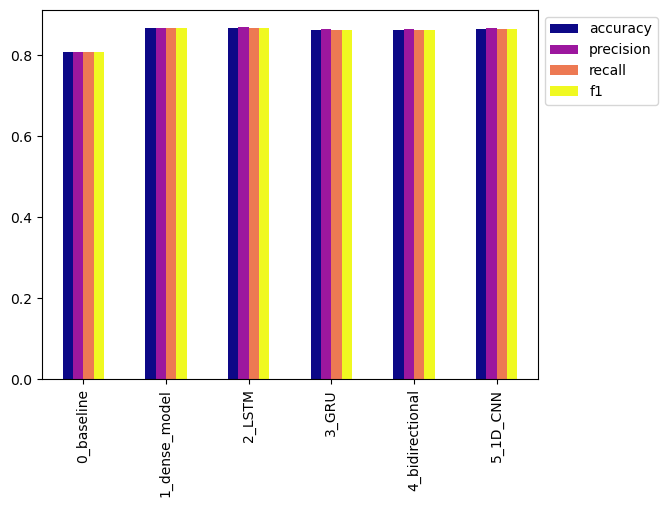

In [34]:
all_model_results.plot(kind='bar', cmap='plasma').legend(bbox_to_anchor=(1.0, 1.0))

In [35]:
for _ in range(0,3):
    i = random.randint(0, len(y_test))
    print(X_test[i], '\ntarget', y_test[i])
    print(f'\nbaseline prediction: {baseline_pred[i]}')
    print(f'\ndense model prediction: {model_1_pred[i]}')
    print(f'\nLSTM prediction: {model_2_pred[i]}')
    print(f'\nGRU prediction: {model_3_pred[i]}')
    print(f'\nBidirectional prediction: {model_4_pred[i]}')
    print(f'\n1D CNN prediction: {model_5_pred[i]}\n\n')

india 
target 0

baseline prediction: 0

dense model prediction: 0.0

LSTM prediction: 0.0

GRU prediction: 0.0

Bidirectional prediction: 0.0

1D CNN prediction: 0.0


cheat death 
target 0

baseline prediction: 0

dense model prediction: 0.0

LSTM prediction: 0.0

GRU prediction: 0.0

Bidirectional prediction: 0.0

1D CNN prediction: 0.0


mentioned fantastic fest in passing to one of my cool south texas friends and he did not know what was talking about may god bless his innocent little soul forever 
target 1

baseline prediction: 1

dense model prediction: 1.0

LSTM prediction: 1.0

GRU prediction: 1.0

Bidirectional prediction: 1.0

1D CNN prediction: 1.0




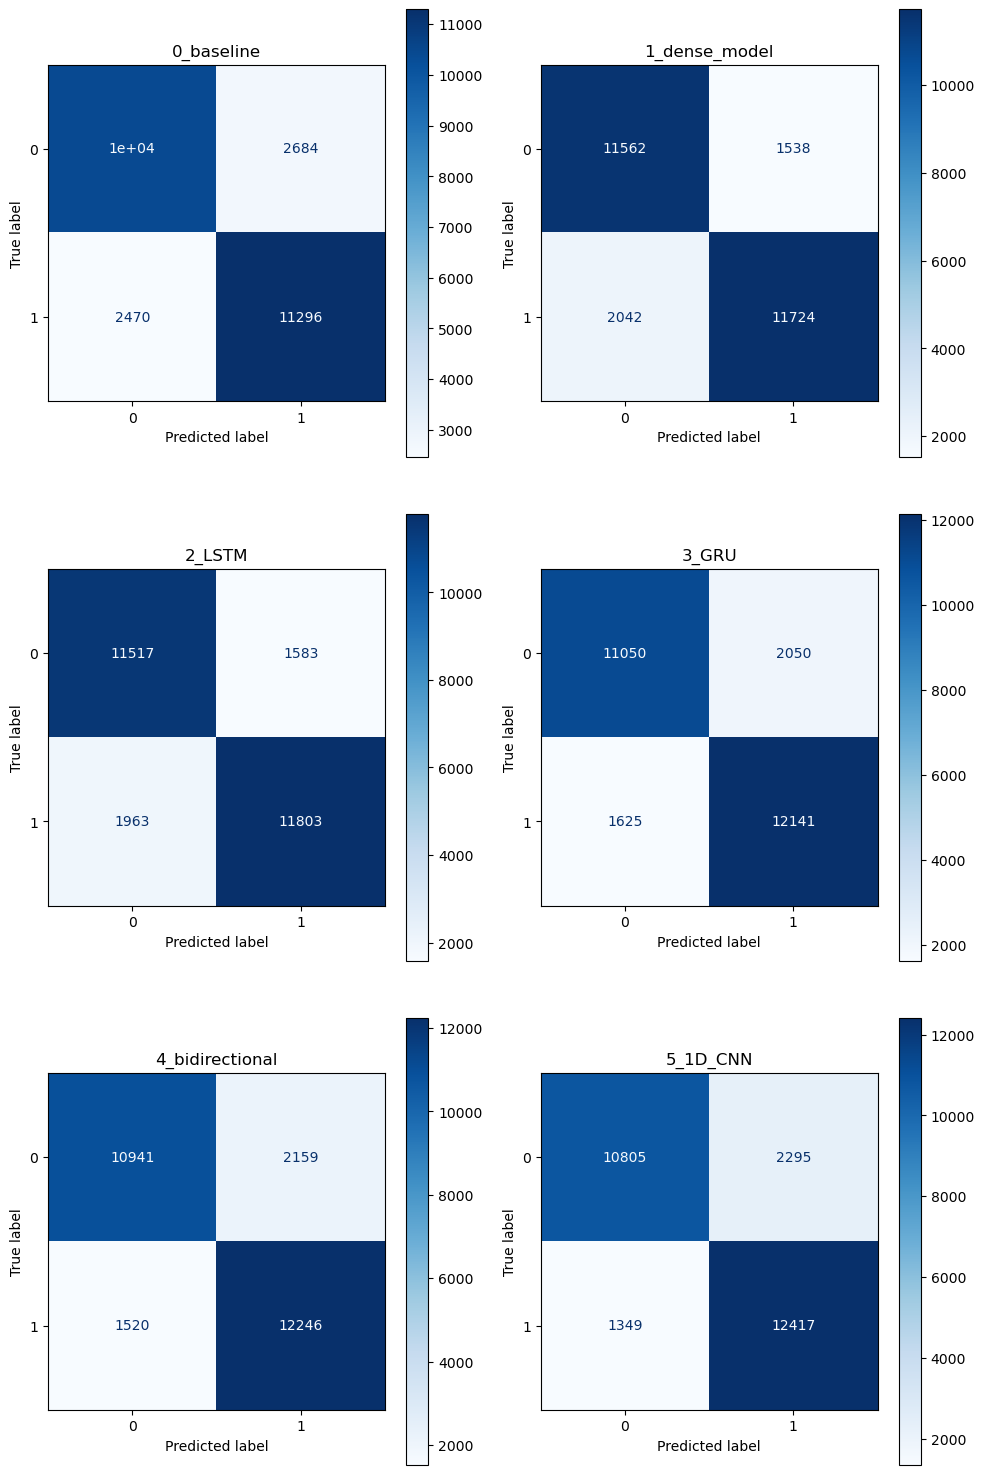

In [36]:
# Confusion matrix for all models
predictions = [baseline_pred, model_1_pred, model_2_pred, model_3_pred, model_4_pred, model_5_pred]
titles = all_model_results.index

fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(10,15))

for i, p, title in zip((ax1, ax2, ax3, ax4, ax5, ax6), predictions, titles):
  cm = confusion_matrix(y_test, p)
  cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
  cm_display.plot(ax=i, cmap='Blues')

  i.set_title(title)

fig.tight_layout(h_pad=3.0)
plt.show()